In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('epa-sea-level.csv')

# Show first few rows
df.head()


,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


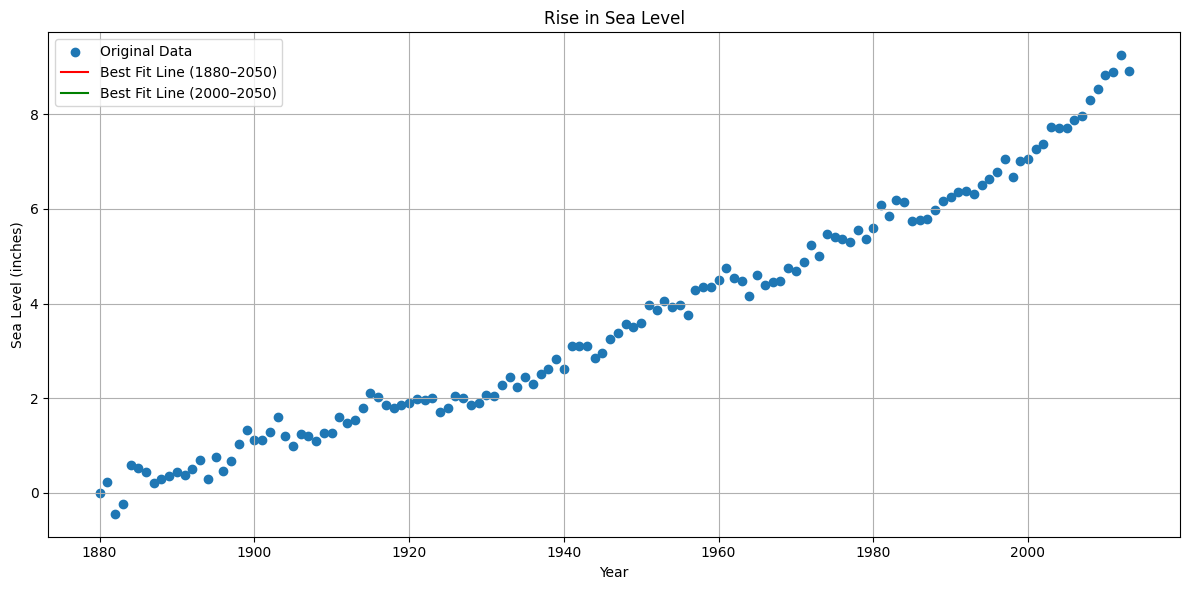

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Create scatter plot
    plt.figure(figsize=(12, 6))
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Original Data')

    # Line of best fit for all data
    slope1, intercept1, *_ = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
    x1 = pd.Series(range(1880, 2051))
    y1 = slope1 * x1 + intercept1
    plt.plot(x1, y1, 'r', label='Best Fit Line (1880–2050)')

    # Line of best fit from year 2000 onwards
    df_recent = df[df['Year'] >= 2000]
    slope2, intercept2, *_ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
    x2 = pd.Series(range(2000, 2051))
    y2 = slope2 * x2 + intercept2
    plt.plot(x2, y2, 'g', label='Best Fit Line (2000–2050)')

    # Labels and title
    plt.xlabel('Year')
    plt.ylabel('Sea Level (inches)')
    plt.title('Rise in Sea Level')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

draw_plot()
